In [4]:
%pip install nltk
%pip install openpyxl
%pip install contractions
%pip install inflect
%pip install spacy
%pip install gensim
%pip install scikit-optimize
%python -m spacy download es_core_news_md

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/ad/ca/1f6d0446d8ed55290ca49db6416c4faeeca579d127f379a2e360f179b69c/spacy-3.7.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd044e6f62a3d317c461f6f0c153c6573ed13025752d779e514000c15dd2/cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.2 from https://files.pythonhosted.org/packages/e4/fc/78cdbdb79f

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


In [5]:
import numpy as np
import pandas as pd
import nltk
import openpyxl

import re, string, unicodedata
import contractions
import inflect


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from skopt import BayesSearchCV
from skopt.space import Real, Integer


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin

In [7]:
import spacy
nlp = spacy.load("es_core_news_md")  # Cargar el modelo de spaCy en español

OSError: [E050] Can't find model 'es_core_news_md'. It doesn't seem to be a Python package or a valid path to a data directory.

Para este caso lo primero que vamos a realizar es una importancio de los modelos necesarios para poder realizar la division de los textos. En eset caso, se sabe que la maoyria d elibrerias se encuentran en ingles. Por esta razon, es necesario realizar y encontrar las librerias spaCy del modleo, para lograr realizar el analisis de textos en español. 

In [8]:
import warnings
warnings.filterwarnings("ignore")

En este puntoo, algo que es necesario decir, es qeu se vana apedir que se ingoren las alertas en python.

In [9]:
pd.set_option("display.max_colwidth", None)

Para este caso, solo es necesario hacer que para l aimpresion se toque los outputs de python para poder ver todo el contenido de las celdas, ya que se esta hablando de opiniones un poco largas.

In [10]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger") 

stop_words = stopwords.words("spanish")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Samue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Samue\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


En este punto se esta realizando, ya algo mas profundo en terminso del desarrollo del analisis de los textos. Para este punto, lo que se esta haciendo es defnir esa palabras que realizan un cierto aporte en el analisis, sobre los textos. En este caso, como la mayoria de librerias son desarrolladas en ingles es necesario realizar la busqueda o adaptacion de estas mismas a español

In [11]:
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [12]:
# Uso de la libreria pandas para la lectura de archivos
data = pd.read_excel('./data/cat_345.xlsx')
# Asignación a una nueva variable de los datos leidos
df_obj=data


En este punto, lo unico que se esta haciendo es la lectura del archivo, para poder cargar la informacion en un dataframe de la libreria de pandas

### 1. Limpieza de datos

##### 1.1 Entendimiento de datos

In [13]:
df_obj.head()

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayudar a explicar la

In [14]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  3000 non-null   object
 1   sdg             3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


Como podemos ver en este dataframe, resultante del analisis de textos, encotramos muy pocas columnas. En un primer momento, se puede ver el id organizador. Luego, encotramos el pilar de este analisis, que es la columna de opiniones de las personas sobre lso bojetivos de desarrollo. Por ultimo, encontramos la columna, que define a que objetivo de desarrollo sostenible hace referencia l aopinion añadida en la columna anterior.

In [15]:
df_obj.describe()

,sdg
count,3000.000000
mean,4.000000
std,0.816633
min,3.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


Para el caso de la unica columna numerica, realizamos un anailisis numericos. Sin embargo, es necesario recorar que esta es una columna numerica, de tipo categorico. Esto quiere decir, que realmente no representa numeros como tal, sino categorias. Par ael caso de proyecto estos numeros vana  ser tomados como los objetivos de desaroollo sostenible asignado a la informacion. Para el analsisi se encontraron 3000 registros. Con una media de 4. Luego una desviacion de 0.81. Luego, una valor minimo de 3 ( que es el objetivo de desarrollo 3). Y por utlimo , una valor maximo de 5 (otro boejtivo de desarrollo).

In [17]:
name_cols_non_number = df_obj.select_dtypes(include = ['object']).columns
df_obj[name_cols_non_number].describe()

,Textos_espanol
count,3000
unique,3000
top,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP."
freq,1


Para este punto realizar este analsisi de tipo  no numerico, realmente no aportae en nada. Sin embargo, se realiz apor motivosd e organizacion y de respetar la estrcutura de los analsis. En este punto, se puede decir que todos los valores de la columna de opiniones son unicos, es decir ,o existe nigun valor parecido a otro por lo que esta parte va a ser porque cada opinion que aparece va a ser relevante con el mismo porcentaje de importancia. 

In [147]:
df_obj["sdg"].value_counts(dropna=False, normalize=True)

sdg
3    0.333333
4    0.333333
5    0.333333
Name: proportion, dtype: float64

En este caso, vemos que la distribucion de datos, frente a los objetivos de desarrollo es equitativa. Esto se debe a que las opiniones estan distribuidas entre los tres objetivos de desarrollo

#### 1.2 Calidad de datos

##### 1.2.1 Completitud

In [18]:
((df_obj.isnull().sum()/df_obj.shape[0])).sort_values(ascending=False)

Textos_espanol    0.0
sdg               0.0
dtype: float64

Como podemso ver no existe nigun valor nulo, en los datos qeu fueron presentados por lo que no deberia tomarse ninguna decision sobre si si o si no se deben tomar en cuenta, puesto que no hay variedad.

##### 1.2.2 Unicidad

In [19]:
df_obj.duplicated(keep = False).sum()

0

Como se puede ver no existen valores duplicados. Esto es que la informacion tiene muy buena cantidad de variedad para eveluar. Po resta razon, no es necesario quitar los valores duplicados.

##### 1.2.3 Consistencia

In [20]:
df_obj["sdg"].describe()

count    3000.000000
mean        4.000000
std         0.816633
min         3.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: sdg, dtype: float64

En este caso, se puede ver que todos los valores cumplen con los rangos dentro de los rangos preedifinidos por los datos. Por ende se dice que estan bien definidos los rangos.

##### 1.2.3 Validez

En este punto, no es necesario analizar, esta opcion. Esto se dbee a qu los datos han cumplidos con todos los formatos. Ademas, que las columnas no tiene ningun tipo de relacion entre si por lo que no se puede decir que incumplen los valores.

#### 1.3 Preparacion de datos

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words
    """Convert all characters to lowercase from list of tokenized words"""

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    stop_words = set(stopwords.words("spanish"))
    new_words = [word for word in words if word not in stop_words]
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

En este punto, se definene funciones o transofrmaciones necesarias para lograr analizar el texto. En un primer momento se va a realizar una transformacion relacionada a ASCII. En esta transformacion,  lo que se busca es quitar esos simbolos o caracteres qeu no esten en un formato ASCII, o algo conocido a ASCII. Luego, para evitar comparacion de las mismas palabras pero unas con mayusculas y las otras en minusculas, lo qu ese va a realizar es una transformacion que busca que todo quede en minsuculas, para que sea mas facil el analisis. Luego, lo que se busca es retirar los puntos, comas, punto y comas. Esto para que el texto quede lo mas puro posible, si se quiere pensar para que el analisis sea solo del contenido. Luego, se necesita que los numeors desaparzecan, en este caso se busca que los numeros sean camibados por palabra, para que no afecte el analisis. Luego, se trae un termino que se habia mencionado antes, que es stopwords. En este caso, lo que se busca es que quitar estas palabras que son recurrentes pero que no aportan en el analsis y lo pueden hacer muy densos.  

In [ ]:
df_obj['Textos_espanol'] = df_obj['Textos_espanol'].apply(contractions.fix) #Aplica la corrección de las contracciones

df_obj['Textos_Tokenizados'] = df_obj['Textos_espanol'].apply(contractions.fix)  # Aplica la corrección de las contracciones
df_obj['Textos_Tokenizados'] = df_obj['Textos_espanol'].apply(preprocessing)  # Aplica la eliminación del ruido
df_obj['Textos_Tokenizados'] = df_obj['Textos_espanol'].apply(word_tokenize)  # Tokeniza las palabras

df_obj.head()

,Textos_espanol,sdg,Textos_Tokenizados
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[Por, ejemplo, ,, el, nÃºmero, de, consultas, externas, de, especialistas, es, de, 319, por, cada, mil, derechohabientes, en, el, SP, ,, en, comparaciÃ³n, con, 338, y, 620, por, cada, mil, derechohabientes, en, el, IMSS, y, el, ISSSTE, ,, respectivamente, ., Si, bien, algunas, de, estas, diferencias, pueden, reflejar, una, necesidad, desigual, (, como, la, poblaciÃ³n, ligeramente, mayor, del, ISSSTE, ), ,, otras, no, pueden, justificarse, de, esta, manera, ., El, nÃºmero, de, recetas, que, no, pudieron, ser, surtidas, en, su, totalidad, por, un, farmacÃ©utico, debido, a, la, falta, de, existencias, es, de, 33, %, dentro, del, SP, en, comparaciÃ³n, con, ...]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[En, 2007, ,, el, gobierno, central, financió, directamente, solo, el, 0,3, %, del, gasto, total, en, salud, ,, pero, realizó, transferencias, específicas, para, el, gasto, en, salud, que, ascendieron, a, otro, 5,6, %, del, gasto, total, ., La, mayor, parte, del, gasto, presupuestario, en, salud, lo, realizan, los, gobiernos, de, los, condados, ., Por, lo, tanto, ,, los, condados, pobres, solo, pueden, ofrecer, un, bajo, nivel, de, atención, a, la, población, local, ., El, gobierno, provincial, proporciona, subsidios, del, lado, de, la, oferta, a, los, hospitales, .]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[Claramente, ,, hay, muchos, otros, factores, en, juego, ,, en, part

En este punto, se aplica las transformaciones realizadas anteriormente.

### 2. Division de datos

In [148]:
# The param 'stratify' is useful to guarantee label proportions on train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_obj[["Textos_espanol"]], df_obj["sdg"], test_size=0.3, stratify=df_obj["sdg"], random_state=1)

En este punto se dividen los datos de entraniemtno y los de prueba respectivamente

In [149]:
X_train.shape, X_test.shape

((2100, 1), (900, 1))

Como podemos ver al sumarlos encontramso qeu entre ambos conjuntos de datos existe una totalidad de 3000 datos. Pero al haber seleccionado qeu los de prueba fueran el 30 por ciento, se van a escoger 9000 para luego, hacer las comparaciones de resultados.

In [150]:
pd.Series(y_train).value_counts(normalize=True)

sdg
4    0.333333
3    0.333333
5    0.333333
Name: proportion, dtype: float64

En este caso volvemos a ver que la reparticion de los objetivos de desarrollo con sus respectiva opiniones es muy equitativa

In [151]:
pd.Series(y_test).value_counts(normalize=True)

sdg
3    0.333333
4    0.333333
5    0.333333
Name: proportion, dtype: float64

En este caso volvemos a ver que la reparticion de los objetivos de desarrollo con sus respectiva opiniones es muy equitativa

### 3. Modelado y evaluacion

### 3.1 Vectorizacion BoW

In [152]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [153]:
X_bow = bow.fit_transform(X_train["Textos_espanol"])

Realizamos la tokenizacion de en la bag of words, organizando las palabras e acuerdo a una tabla que se hace detras del algoritmo

In [154]:
print("Vocabulary size:", len(bow.vocabulary_))

Vocabulary size: 15550


Como podemos ver se encontaron o se creo un vocabulario de 15550 palabras

### 3.1.1 BoW con clasificacion Random Forest Classifier

In [ ]:
bow_model = RandomForestClassifier(random_state=2)

In [ ]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<Axes: >

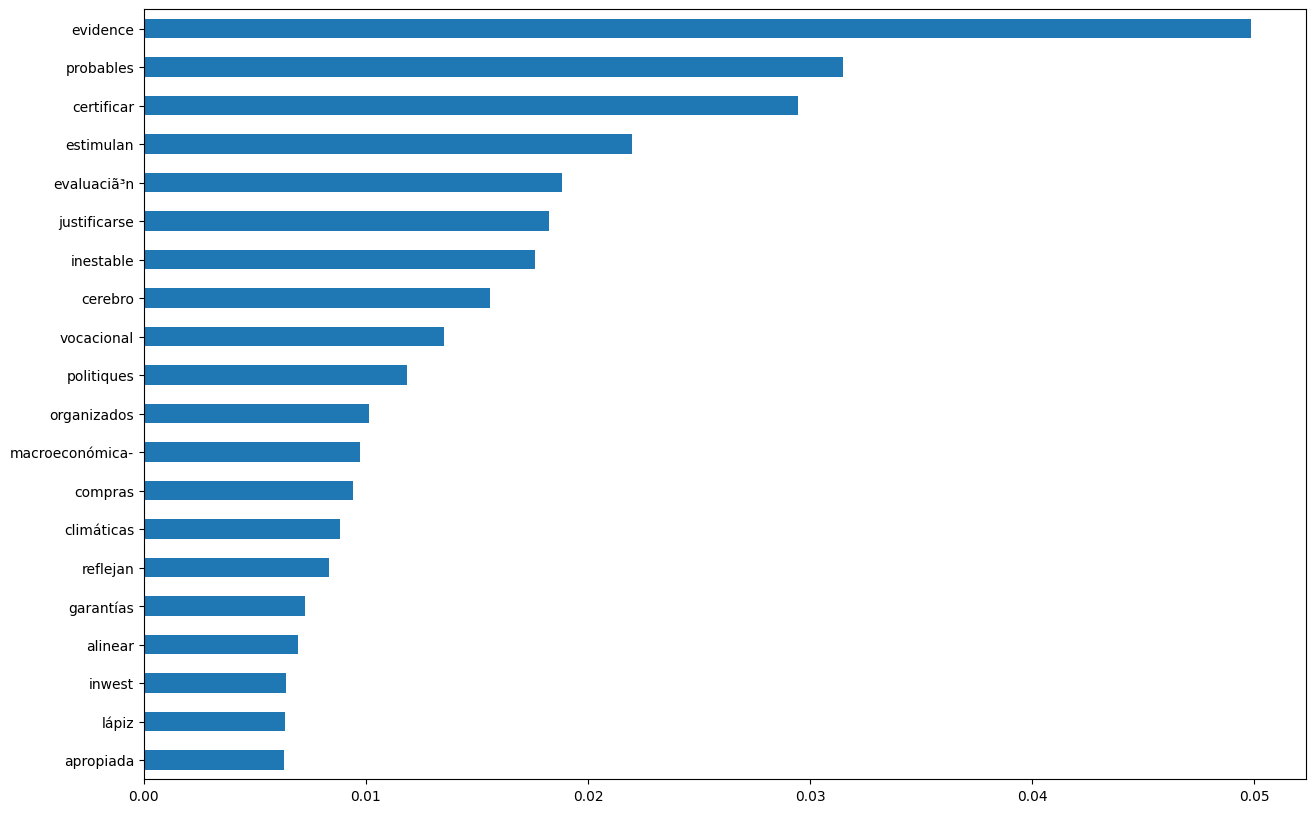

In [ ]:
# Feature importance in tree models is an indicator on how relevant is a feature for taking the decision by the model
pd.Series(bow_model.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [ ]:
bow_estimators = bow_model.estimators_
print("Number of trees:", len(bow_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 101.74


In [ ]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test["Textos_espanol"]))

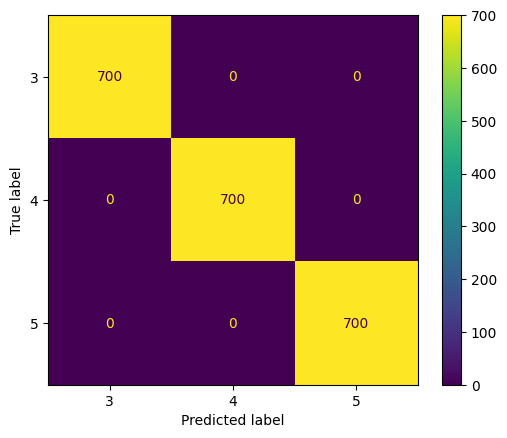

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

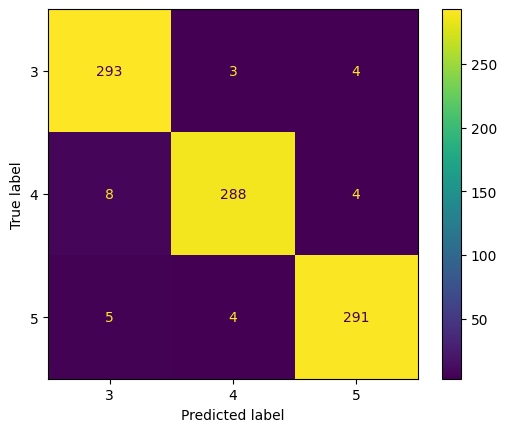

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [ ]:
print("Precision:", precision_score(y_train, y_train_bow_predict, average='weighted'))
print("Recall:", recall_score(y_train, y_train_bow_predict, average='weighted'))
print("F1:", f1_score(y_train, y_train_bow_predict, average='weighted'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [ ]:
print("Precision:", precision_score(y_test, y_test_bow_predict,average='weighted'))
print("Recall:", recall_score(y_test, y_test_bow_predict,average='weighted'))
print("F1:", f1_score(y_test, y_test_bow_predict,average='weighted'))

Precision: 0.9690105578223832
Recall: 0.9688888888888889
F1: 0.9688944307233576


#### 3.2 Vectorizacion TFID

In [155]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [156]:
X_tfidf = tfidf.fit_transform(X_train["Textos_espanol"])

Realizamos la tokenizacion de en la TFID, organizando las palabras  detras del algoritmo

In [157]:
print("Vocabulary size:", len(tfidf.vocabulary_))

Vocabulary size: 15550


Como podemos ver se encontaron o se creo un vocabulario de 15550 palabras

#### 3.2.1 Modelo Clasificacion Random Forest Classifier con TF-IDF

In [ ]:
tfidf_model = RandomForestClassifier(random_state=3)

In [ ]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

<Axes: >

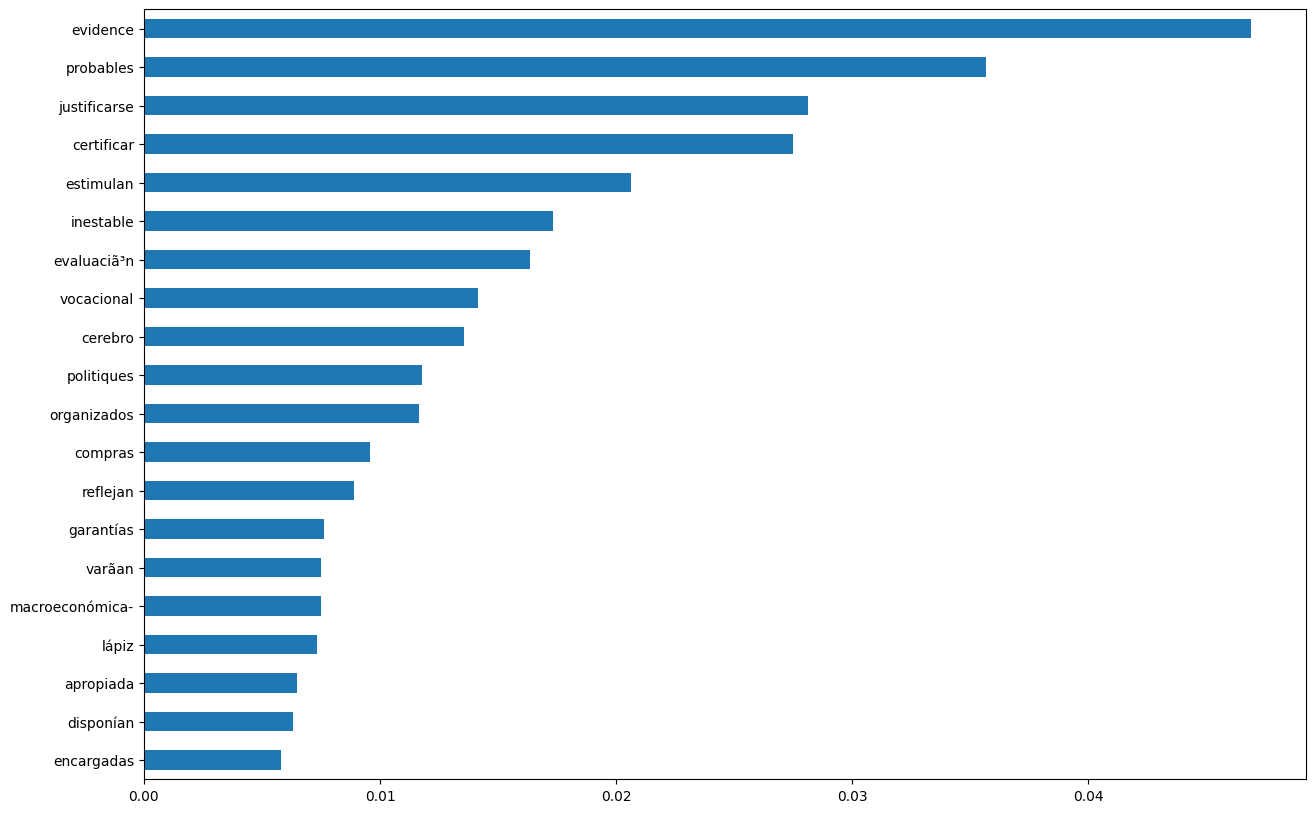

In [ ]:
pd.Series(tfidf_model.feature_importances_, index=tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [ ]:
tfidf_estimators = tfidf_model.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 97.87


In [ ]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test["Textos_espanol"]))

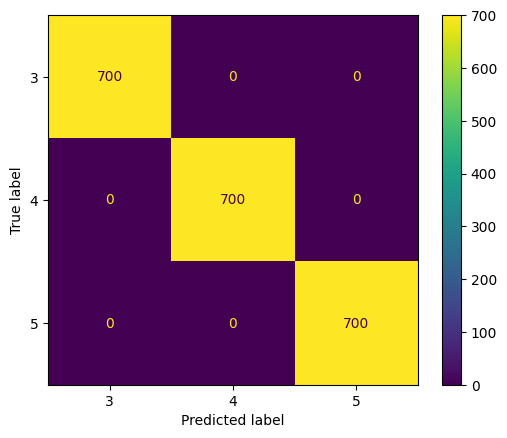

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

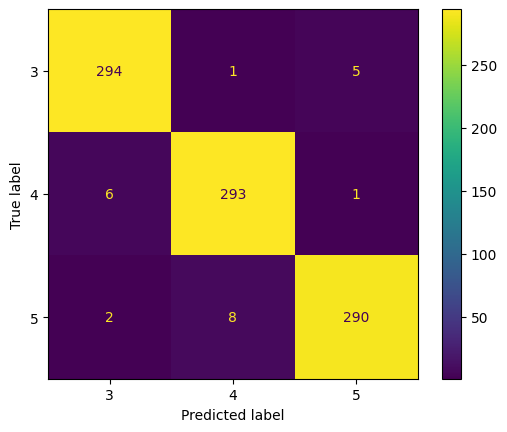

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [ ]:
print("Precision:", precision_score(y_train, y_train_tfidf_predict,average='weighted'))
print("Recall:", recall_score(y_train, y_train_tfidf_predict,average='weighted'))
print("F1:", f1_score(y_train, y_train_tfidf_predict,average='weighted'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [ ]:
print("Precision:", precision_score(y_test, y_test_tfidf_predict,average='weighted'))
print("Recall:", recall_score(y_test, y_test_tfidf_predict,average='weighted'))
print("F1:", f1_score(y_test, y_test_tfidf_predict,average='weighted'))

Precision: 0.9744794463337509
Recall: 0.9744444444444444
F1: 0.9744401584576394


### Doc2Vec Vectorizacion y Clasificacion

In [167]:
def tokenize_and_tag(texts):
    tagged_data = []
    for i, text in enumerate(texts):
        words = word_tokenize(text)
        tags = [i]
        tagged_data.append(TaggedDocument(words=words, tags=tags))
    return tagged_data

# Tokeniza y etiqueta los textos de entrenamiento y prueba
tagged_data_train = tokenize_and_tag(X_train["Textos_espanol"])
tagged_data_test = tokenize_and_tag(X_test["Textos_espanol"])




In [168]:
# Crea un modelo Doc2Vec
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)

# Construye el vocabulario
doc2vec_model.build_vocab(tagged_data_train)

# Entrena el modelo Doc2Vec
doc2vec_model.train(tagged_data_train, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)




In [169]:
# Vectoriza los textos de entrenamiento y prueba
X_train['doc2vec_features'] = [doc2vec_model.infer_vector(doc.words) for doc in tagged_data_train]
X_test['doc2vec_features'] = [doc2vec_model.infer_vector(doc.words) for doc in tagged_data_test]


### Clasificacion Random Forest Classifier

In [170]:

# Modelo con Doc2Vec
doc2vec_model = RandomForestClassifier(random_state=5)
doc2vec_model.fit(list(X_train['doc2vec_features']), y_train)
y_train_doc2vec_predict = doc2vec_model.predict(list(X_train['doc2vec_features']))
y_test_doc2vec_predict = doc2vec_model.predict(list(X_test['doc2vec_features']))


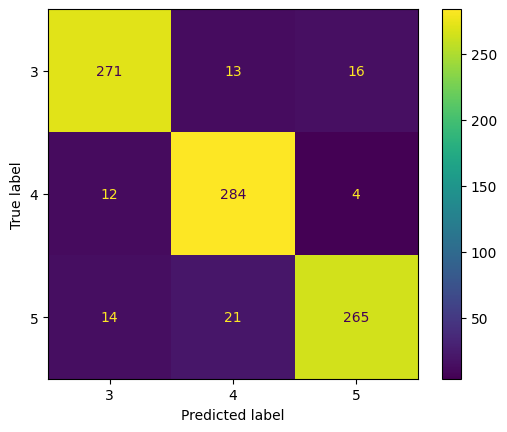

In [171]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_doc2vec_predict)

In [172]:
precision_doc2vec = precision_score(y_test, y_test_doc2vec_predict, average='weighted')
recall_doc2vec = recall_score(y_test, y_test_doc2vec_predict, average='weighted')
f1_doc2vec = f1_score(y_test, y_test_doc2vec_predict, average='weighted')

print("Precision:", precision_doc2vec)
print("Recall:", recall_doc2vec)
print("F1:", f1_doc2vec)

Precision: 0.9117880782892368
Recall: 0.9111111111111111
F1: 0.910983151311004


# Doc2Vec Regresion Logisitca

In [173]:
# Crea un modelo de Regresión Logística
logistic_model = LogisticRegression(random_state=5, max_iter=1000)

# Entrena el modelo con los vectores de características generados por Doc2Vec
logistic_model.fit(list(X_train['doc2vec_features']), y_train)

# Realiza predicciones en los datos de prueba
y_test_logistic_predict = logistic_model.predict(list(X_test['doc2vec_features']))

# Calcula las métricas de evaluación
precision_logistic = precision_score(y_test, y_test_logistic_predict, average='weighted')
recall_logistic = recall_score(y_test, y_test_logistic_predict, average='weighted')
f1_logistic = f1_score(y_test, y_test_logistic_predict, average='weighted')

print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1:", f1_logistic)

Precision: 0.9259691568994703
Recall: 0.9255555555555556
F1: 0.9253625278446185


# Doc2Vec SVM

In [174]:
# Crea un modelo de Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=5)

# Entrena el modelo con los vectores de características generados por Doc2Vec
svm_model.fit(list(X_train['doc2vec_features']), y_train)

# Realiza predicciones en los datos de prueba
y_test_svm_predict = svm_model.predict(list(X_test['doc2vec_features']))

# Calcula las métricas de evaluación
precision_svm = precision_score(y_test, y_test_svm_predict, average='weighted')
recall_svm = recall_score(y_test, y_test_svm_predict, average='weighted')
f1_svm = f1_score(y_test, y_test_svm_predict, average='weighted')

print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print("F1 (SVM):", f1_svm)

Precision (SVM): 0.9123770685438404
Recall (SVM): 0.9111111111111111
F1 (SVM): 0.9109869780841157


## GloVe Vectorizacion y Clasificacion

In [175]:
def glove_vectorize(text):
    doc = nlp(text)
    return doc.vector

In [176]:
# Agrega una nueva columna de características a tus datos
X_train['glove_features'] = X_train["Textos_espanol"].apply(glove_vectorize)
X_test['glove_features'] = X_test["Textos_espanol"].apply(glove_vectorize)

### Clasificacion Random Forest Classifier

In [177]:
# Crear un modelo RandomForestClassifier para GloVe
glove_model = RandomForestClassifier(random_state=4)
glove_model.fit(list(X_train['glove_features']), y_train)

RandomForestClassifier(random_state=4)

In [178]:
# Predecir con el modelo de GloVe
y_train_glove_predict = glove_model.predict(list(X_train['glove_features']))
y_test_glove_predict = glove_model.predict(list(X_test['glove_features']))

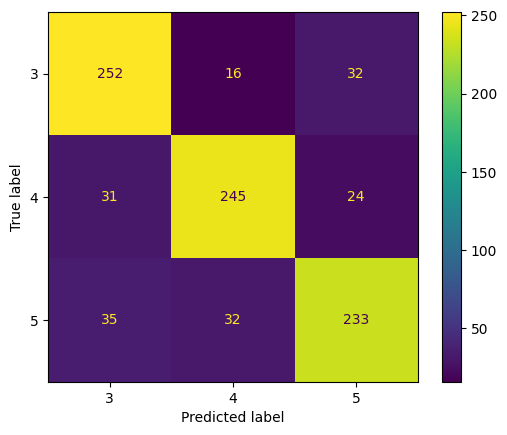

In [179]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_glove_predict)

In [180]:
# Calcula métricas para el modelo de GloVe
precision_glove = precision_score(y_test, y_test_glove_predict, average='weighted')
recall_glove = recall_score(y_test, y_test_glove_predict, average='weighted')
f1_glove = f1_score(y_test, y_test_glove_predict, average='weighted')

print("Precision:", precision_glove)
print("Recall:", recall_glove)
print("F1:", f1_glove)

Precision: 0.8116195594312773
Recall: 0.8111111111111111
F1: 0.811004123886316


### GloVe con Regresion logistica 

Precision (Logistic Regression): 0.9611219137002757
Recall (Logistic Regression): 0.9611111111111111
F1 (Logistic Regression): 0.9611147376643947


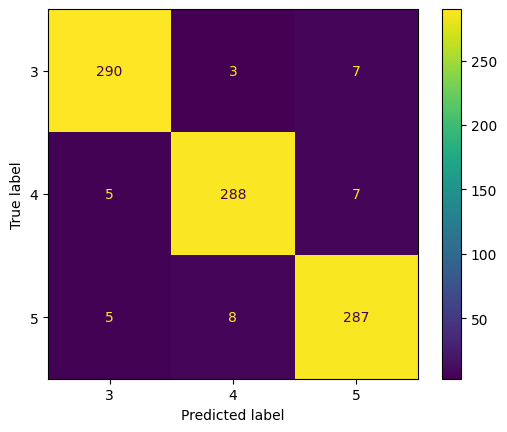

In [181]:
# Crear un modelo de Regresión Logística para GloVe
logistic_regression_model = LogisticRegression(random_state=4, max_iter=1000)

# Entrenar el modelo con las características de GloVe
logistic_regression_model.fit(list(X_train['glove_features']), y_train)

# Predecir con el modelo de Regresión Logística en los datos de entrenamiento y prueba
y_train_logistic_predict = logistic_regression_model.predict(list(X_train['glove_features']))
y_test_logistic_predict = logistic_regression_model.predict(list(X_test['glove_features']))

# Calcular la matriz de confusión en los datos de prueba
confusion_matrix_logistic = confusion_matrix(y_test, y_test_logistic_predict)

# Mostrar la matriz de confusión
ConfusionMatrixDisplay(confusion_matrix_logistic, display_labels=logistic_regression_model.classes_).plot(cmap='viridis')

# Calcular métricas para el modelo de Regresión Logística
precision_logistic = precision_score(y_test, y_test_logistic_predict, average='weighted')
recall_logistic = recall_score(y_test, y_test_logistic_predict, average='weighted')
f1_logistic = f1_score(y_test, y_test_logistic_predict, average='weighted')

print("Precision (Logistic Regression):", precision_logistic)
print("Recall (Logistic Regression):", recall_logistic)
print("F1 (Logistic Regression):", f1_logistic)

### GloVe con SMC

In [182]:
"""

# Definir el espacio de búsqueda de hiperparámetros
param_space = {
    'n_estimators': Integer(10, 1000),  # Número de árboles en el bosque
    'max_depth': Integer(1, 32),  # Profundidad máxima de los árboles
    'min_samples_split': Real(0.01, 1.0),  # Fracción mínima de muestras requerida para dividir un nodo
    'min_samples_leaf': Real(0.01, 0.5),  # Fracción mínima de muestras requerida en un nodo hoja
    'max_features': ['auto', 'sqrt', 'log2'],  # Número máximo de características a considerar en cada división
}

# Crear el objeto BayesSearchCV
smc = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=4),
    search_spaces=param_space,
    n_iter=50,  # Número de iteraciones de SMC
    scoring='f1_weighted',  # Métrica para optimizar (puedes cambiarla según tus necesidades)
    n_jobs=-1,  # Utilizar todos los núcleos de CPU disponibles
    cv=5,  # Número de divisiones para la validación cruzada
    random_state=4
)

# Ajustar el modelo SMC a los datos
smc.fit(list(X_train['glove_features']), y_train)

# Obtener los mejores hiperparámetros
best_params = smc.best_params_
print("Mejores hiperparámetros:", best_params)

# Crear un modelo RandomForestClassifier con los mejores hiperparámetros
best_glove_model = RandomForestClassifier(random_state=4, **best_params)
best_glove_model.fit(list(X_train['glove_features']), y_train)

# Predecir con el modelo de GloVe optimizado
y_test_glove_predict = best_glove_model.predict(list(X_test['glove_features']))

# Calcular métricas para el modelo de GloVe optimizado
precision_glove = precision_score(y_test, y_test_glove_predict, average='weighted')
recall_glove = recall_score(y_test, y_test_glove_predict, average='weighted')
f1_glove = f1_score(y_test, y_test_glove_predict, average='weighted')

print("Precision:", precision_glove)
print("Recall:", recall_glove)
print("F1:", f1_glove)
"""

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

##  Modelo Clasificacion Random Forest Classifier con TF-IDF

In [ ]:
tfidf_model = RandomForestClassifier(random_state=3)

In [ ]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

<Axes: >

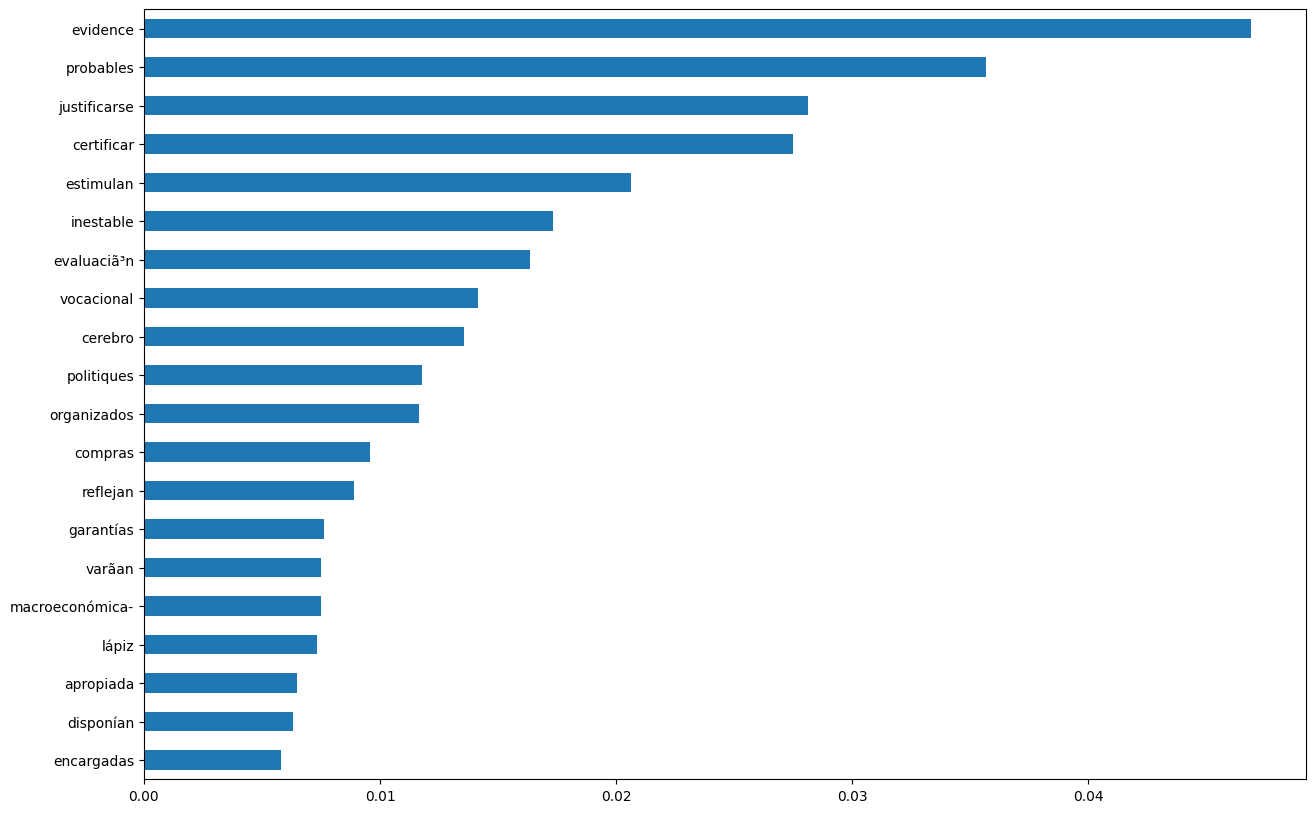

In [ ]:
pd.Series(tfidf_model.feature_importances_, index=tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [ ]:
tfidf_estimators = tfidf_model.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 97.87


In [ ]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test["Textos_espanol"]))

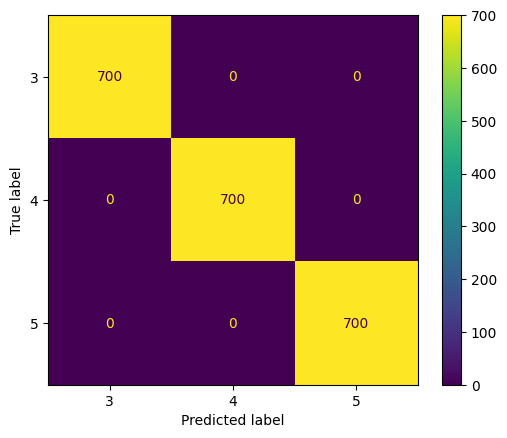

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

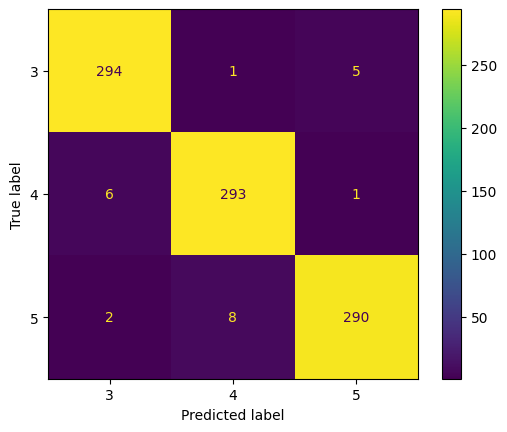

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [ ]:
print("Precision:", precision_score(y_train, y_train_tfidf_predict,average='weighted'))
print("Recall:", recall_score(y_train, y_train_tfidf_predict,average='weighted'))
print("F1:", f1_score(y_train, y_train_tfidf_predict,average='weighted'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [ ]:
print("Precision:", precision_score(y_test, y_test_tfidf_predict,average='weighted'))
print("Recall:", recall_score(y_test, y_test_tfidf_predict,average='weighted'))
print("F1:", f1_score(y_test, y_test_tfidf_predict,average='weighted'))

Precision: 0.9744794463337509
Recall: 0.9744444444444444
F1: 0.9744401584576394


## Model Selection

In [ ]:
"""
pipeline = Pipeline(steps = [
    ("vectorizer", CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)),
    ("classifier", RandomForestClassifier(random_state=4))
])
"""

'\npipeline = Pipeline(steps = [\n    ("vectorizer", CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)),\n    ("classifier", RandomForestClassifier(random_state=4))\n])\n'

In [ ]:
"""
param_grid = {
    "vectorizer": [CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words), TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words)],
    "vectorizer__lowercase": [True, False],
    "classifier__n_estimators": [50, 100],
    "classifier__criterion": ['gini', 'entropy'],
    "classifier__max_depth": [25, 50, 75, 100]
}
"""

'\nparam_grid = {\n    "vectorizer": [CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words), TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words)],\n    "vectorizer__lowercase": [True, False],\n    "classifier__n_estimators": [50, 100],\n    "classifier__criterion": [\'gini\', \'entropy\'],\n    "classifier__max_depth": [25, 50, 75, 100]\n}\n'

In [ ]:
"""search = RandomizedSearchCV(pipeline, param_grid, n_iter=7, scoring=["precision", "recall", "f1"], refit="f1", cv=10, return_train_score=True, verbose=1, random_state=5)"""

'search = RandomizedSearchCV(pipeline, param_grid, n_iter=7, scoring=["precision", "recall", "f1"], refit="f1", cv=10, return_train_score=True, verbose=1, random_state=5)'

In [ ]:
"""search.fit(X_train["Textos_espanol"], y_train)"""

'search.fit(X_train["Textos_espanol"], y_train)'

In [ ]:
"""search.best_params_"""

'search.best_params_'

In [ ]:
"""search.best_score_"""

'search.best_score_'

In [ ]:
"""y_train_search_predict = search.best_estimator_.predict(X_train["Textos_espanol"])
y_test_search_predict = search.best_estimator_.predict(X_test["Textos_espanol"])"""

'y_train_search_predict = search.best_estimator_.predict(X_train["Textos_espanol"])\ny_test_search_predict = search.best_estimator_.predict(X_test["Textos_espanol"])'

In [ ]:
"""print("Precision:", precision_score(y_train, y_train_search_predict,average='weighted'))
print("Recall:", recall_score(y_train, y_train_search_predict,average='weighted'))
print("F1:", f1_score(y_train, y_train_search_predict,average='weighted'))"""

'print("Precision:", precision_score(y_train, y_train_search_predict,average=\'weighted\'))\nprint("Recall:", recall_score(y_train, y_train_search_predict,average=\'weighted\'))\nprint("F1:", f1_score(y_train, y_train_search_predict,average=\'weighted\'))'

In [ ]:
"""print("Precision:", precision_score(y_test, y_test_search_predict,average='weighted'))
print("Recall:", recall_score(y_test, y_test_search_predict,average='weighted'))
print("F1:", f1_score(y_test, y_test_search_predict,average='weighted'))"""

'print("Precision:", precision_score(y_test, y_test_search_predict,average=\'weighted\'))\nprint("Recall:", recall_score(y_test, y_test_search_predict,average=\'weighted\'))\nprint("F1:", f1_score(y_test, y_test_search_predict,average=\'weighted\'))'